In this notebook basic exploratory data analysis is performed to showcase the yield curve dataset we are working with [Liu and Wu, 2021].

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils.data_utils import load_yield_data

yield_data = load_yield_data()
FIRST_DATE = yield_data.index.min()
LAST_DATE = yield_data.index.max()
selected_maturities = ['12m', '24m', '36m', '48m', '60m', '72m', '84m', '96m', '108m', '120m']

## Selected yield time series:

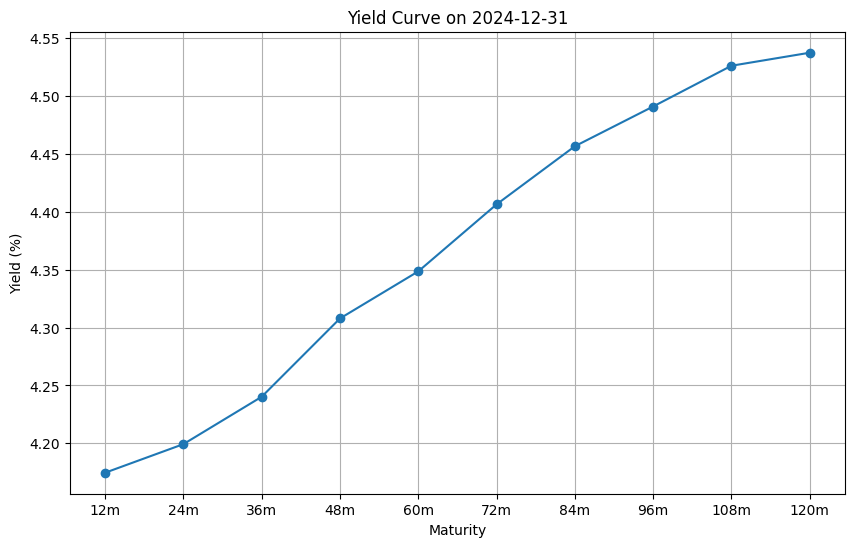

In [2]:
# Plot yield curve at last date in dataset
plt.figure(figsize=(10, 6))
plt.plot(selected_maturities, yield_data.loc[LAST_DATE, selected_maturities], marker='o')
plt.title(f'Yield Curve on {LAST_DATE.date()}')
plt.xlabel('Maturity')
plt.ylabel('Yield (%)')
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

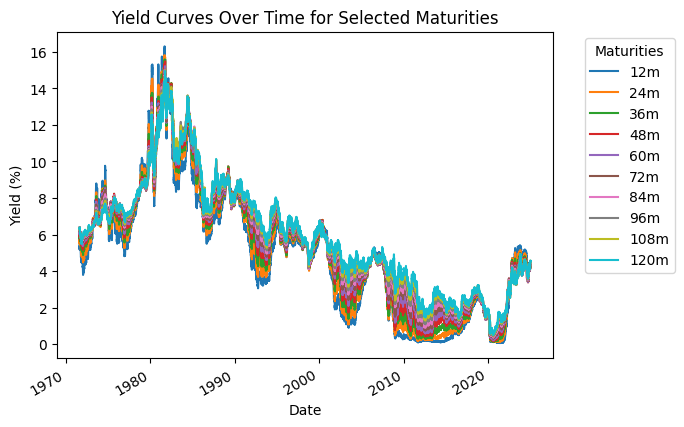

In [3]:
# plot yield curves
plt.figure(figsize=(12, 6))
yield_data[selected_maturities].plot()
plt.title('Yield Curves Over Time for Selected Maturities')
plt.xlabel('Date')
plt.ylabel('Yield (%)')
plt.legend(title='Maturities', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## 3D surface plot of yields:

C:\Users\ulrik\AppData\Local\Temp\ipykernel_36200\833384783.py:36: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


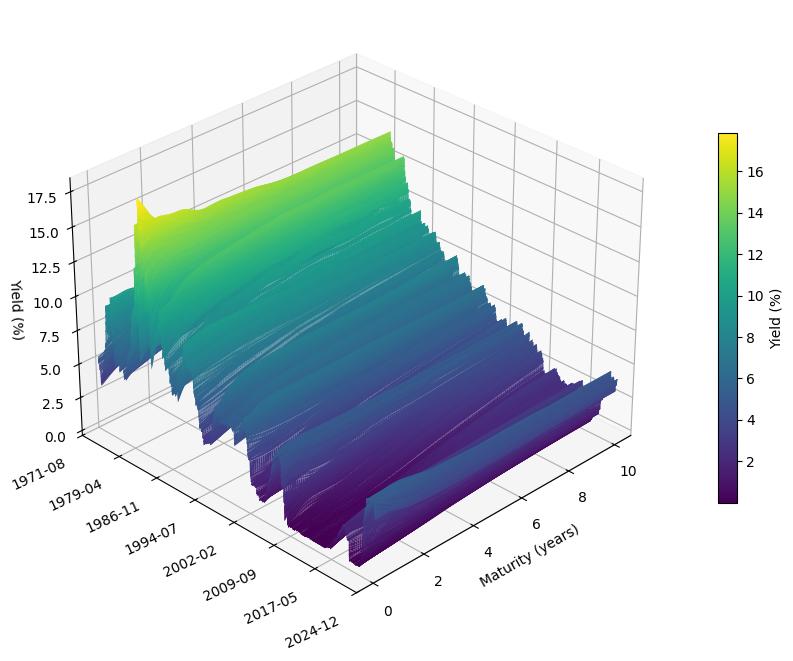

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
 
cols = yield_data.columns.astype(str)
months = cols.str.extract(r'(\d+)', expand=False).astype(int).values
maturities_years = months / 12.0
 
date_nums = mdates.date2num(yield_data.index.to_pydatetime())
 
X, Y = np.meshgrid(maturities_years, date_nums)           
Z = yield_data.values.astype(float)                               
  
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111, projection='3d')
 
surf = ax.plot_surface(
    X, Y, Z,
    cmap='viridis', edgecolor='none', antialiased=True, rstride=1, cstride=1
)
 
ax.set_xlabel('Maturity (years)')
ax.set_zlabel('Yield (%)')
 
# readable date ticks on the y-axis (numeric date -> label)
n_date_ticks = 8
date_tick_vals = np.linspace(date_nums.min(), date_nums.max(), n_date_ticks)
ax.set_yticks(date_tick_vals)
ax.set_yticklabels([mdates.num2date(d).strftime('%Y-%m') for d in date_tick_vals], rotation=25, ha='right')
 
# invert date axis so earliest (1985) is "furthest out" (at the back)
ax.set_ylim(date_nums.max(), date_nums.min())
 
fig.colorbar(surf, ax=ax, shrink=0.6, label='Yield (%)')
ax.view_init(elev=30, azim=-135)
plt.tight_layout()
plt.show() 

## Summary statistics:

In [5]:
print(f"Data from {FIRST_DATE.date()} to {LAST_DATE.date()}")
print(f"Yield data shape: {yield_data.shape}")
yield_data[selected_maturities].describe()

Data from 1971-08-16 to 2024-12-31
Yield data shape: (13332, 120)


,12m,24m,36m,48m,60m,72m,84m,96m,108m,120m
count,13332.000000,13332.000000,13332.000000,13332.000000,13332.000000,13332.000000,13332.000000,13332.000000,13332.000000,13332.000000
mean,4.827549,5.044983,5.221007,5.387817,5.512956,5.641681,5.735741,5.817523,5.885439,5.939303
std,3.503258,3.455484,3.384208,3.318220,3.242754,3.196548,3.140445,3.096387,3.052878,2.989736
min,0.060269,0.113766,0.114744,0.150732,0.207773,0.287248,0.356766,0.423145,0.469824,0.506891
25%,1.646415,1.861121,2.243040,2.543687,2.742368,2.932864,3.164767,3.374059,3.518717,3.679408
50%,4.955961,4.995608,5.217059,5.428448,5.547736,5.649489,5.743428,5.816085,5.857833,5.904620
75%,6.916221,7.164978,7.361845,7.543437,7.642419,7.686693,7.689474,7.722778,7.732023,7.775035
max,16.297752,15.819965,15.573201,15.475148,15.195371,15.031602,15.018964,14.989822,14.979803,14.950148


## Selected empirical distributions:

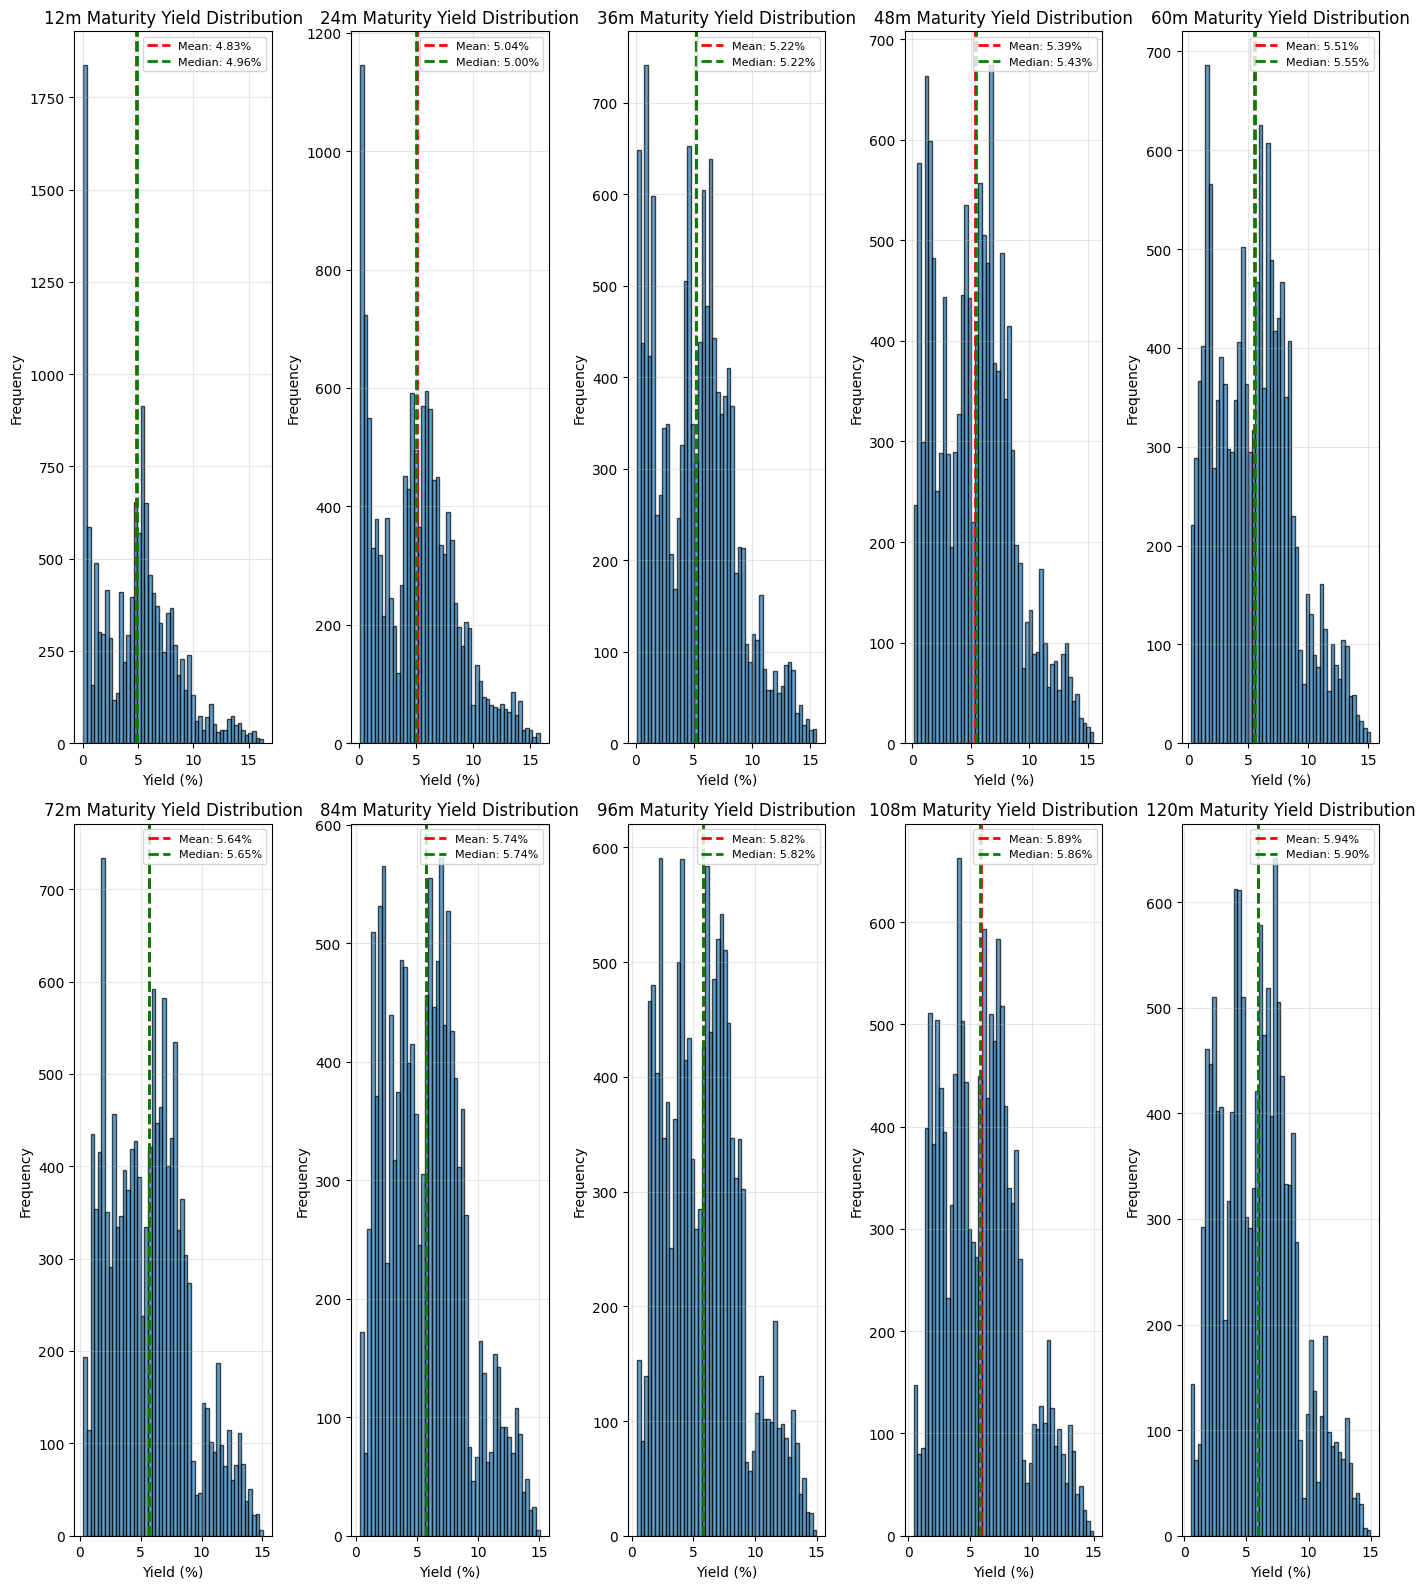

In [6]:
fig, axes = plt.subplots(2, 5, figsize=(14, 16))
axes = axes.flatten()

for idx, maturity in enumerate(selected_maturities):
    ax = axes[idx]
    
    # Plot histogram
    ax.hist(yield_data[maturity].dropna(), bins=50, alpha=0.7, edgecolor='black')
    
    # Add labels and title
    ax.set_xlabel('Yield (%)')
    ax.set_ylabel('Frequency')
    ax.set_title(f'{maturity} Maturity Yield Distribution')
    
    # Add mean and median lines
    mean_val = yield_data[maturity].mean()
    median_val = yield_data[maturity].median()
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}%')
    ax.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}%')
    ax.legend(fontsize=8)
    
    # Add grid
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Heatmap:

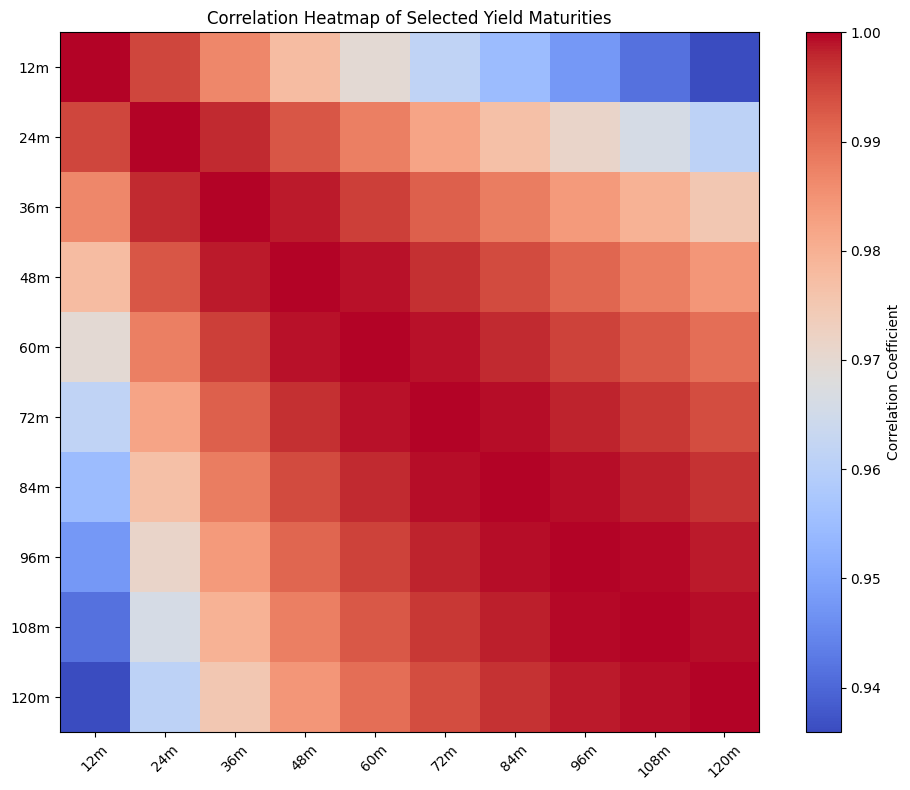

In [7]:
# Plot a heatmap showing correlation of the selected yields:
plt.figure(figsize=(10, 8))
correlation_matrix = yield_data[selected_maturities].corr()
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(ticks=np.arange(len(selected_maturities)), labels=selected_maturities
, rotation=45)
plt.yticks(ticks=np.arange(len(selected_maturities)), labels=selected_maturities)
plt.title('Correlation Heatmap of Selected Yield Maturities')
plt.tight_layout()
plt.show() 

I will additionally be using the FRED-MD dataset to explore the macroeconomic associations of the yield curve factors and the macroeconomy using marginal $R^2$ analyses in the coming notebooks.

References:
* Yan Liu and Jing Cynthia Wu "Reconstructing the Yield Curve", Journal of Financial Economics, 2021, 142 (3), 1395-1425. 
* FRED-MD: https://www.stlouisfed.org/research/economists/mccracken/fred-databases